### **Data Ingestion**

In [56]:
# import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown as gd

### **Data Ingestion**

In [57]:
# #download the dataset from google drive

# url = 'https://docs.google.com/spreadsheets/d/14g3FeBnTxvtvfEttIId2STkTeQlhi09m/view?usp=sharing'
# id = '14g3FeBnTxvtvfEttIId2STkTeQlhi09m'

# gd.download(f'https://drive.google.com/uc?id={id}', quiet=False)

In [58]:
#assign a variable name to the dataset

file = pd.read_csv('sales_data.xls')

### **Preliminary Data Analysis**

In [59]:
file.head(10)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
5,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,11,3206,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
7,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
8,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
9,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [60]:
file.shape

(578320, 12)

In [61]:
file.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status', 'location'],
      dtype='object')

### **Data Cleaning**

In [62]:
# check for missing values
file.isna().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

### **Exploratory Data Analysis**

In [63]:
# set the index as location

file.set_index('location', inplace=True)

In [64]:
file.head(5)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


In [65]:
file.index.unique().sort_values()

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=243)

In [66]:
unique_index = file.index.value_counts()
unique_index.head(20)

location
Korea                          6997
Argentina                      4507
Mauritius                      4414
Jersey                         4130
Panama                         3936
French Guiana                  3851
Guernsey                       3804
Guatemala                      3731
Albania                        3721
Philippines                    3675
Mali                           3670
Congo                          3642
Finland                        3615
Cape Verde                     3509
Christmas Island               3471
China                          3429
France                         3425
French Southern Territories    3421
Poland                         3355
Cyprus                         3345
Name: count, dtype: int64

<Axes: xlabel='location'>

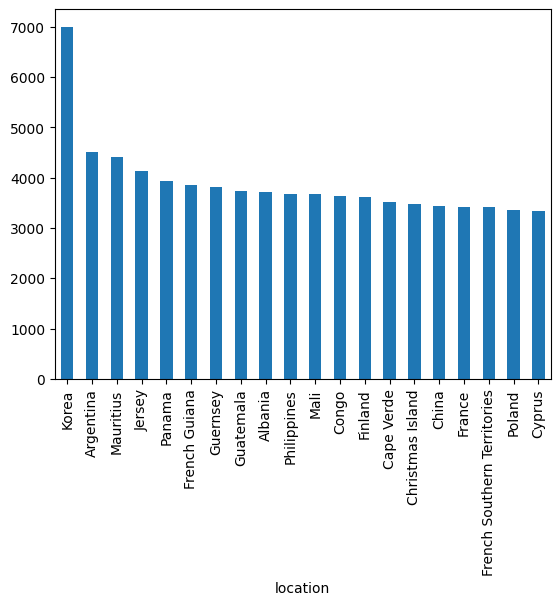

In [67]:
unique_index.head(20).plot(kind= 'bar')

<Axes: xlabel='location'>

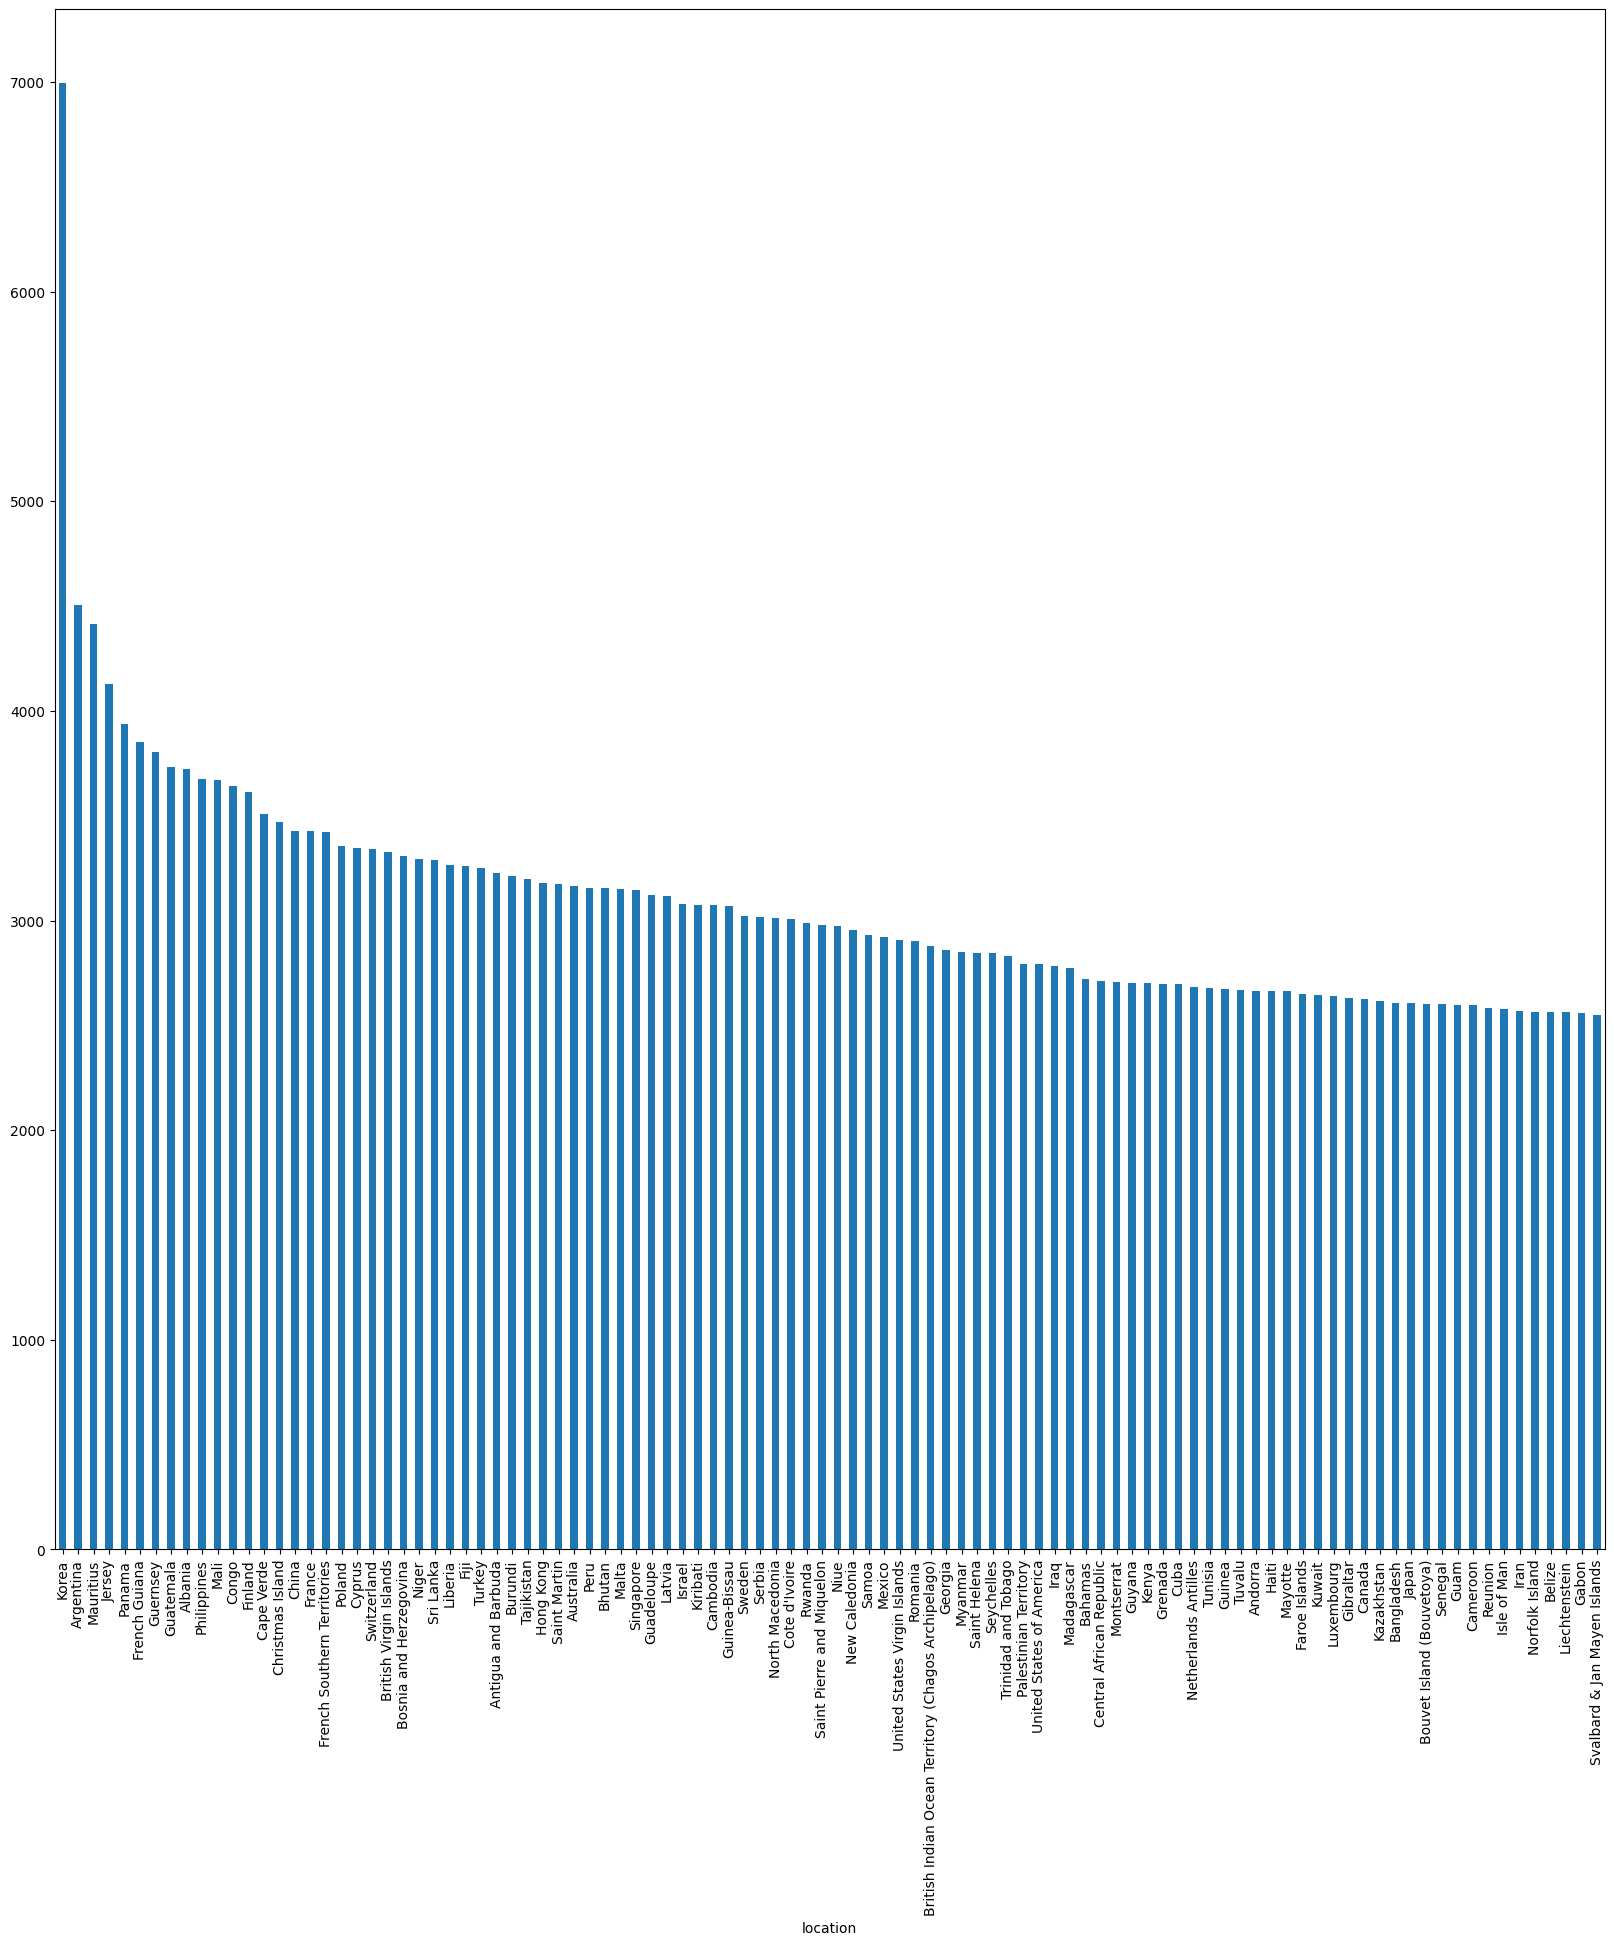

In [68]:
file.index.value_counts().head(100).plot(kind = 'bar',figsize = (20,20))

In [69]:
unique_index.nunique

<bound method IndexOpsMixin.nunique of location
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Name: count, Length: 243, dtype: int64>

In [70]:
file.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [71]:
# Filtering/ Masking...
# Using Booleans "AND" & "OR"
# AND in pandas is written as "&"
# OR in pandas is written as "|"
#-------------------------------------------------#

In [72]:
file['customer_id'].unique

<bound method Series.unique of location
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
                                    ...                 
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Name: customer_id, Length: 578320, dtype: object>

In [73]:
file[file['customer_id'] == 'ef15a7b3-326c-405f-9eef-3dbf43c85a9d']

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed


In [74]:
# get the total number of unique customers
file['customer_id'].nunique()

4594

<Axes: xlabel='customer_id'>

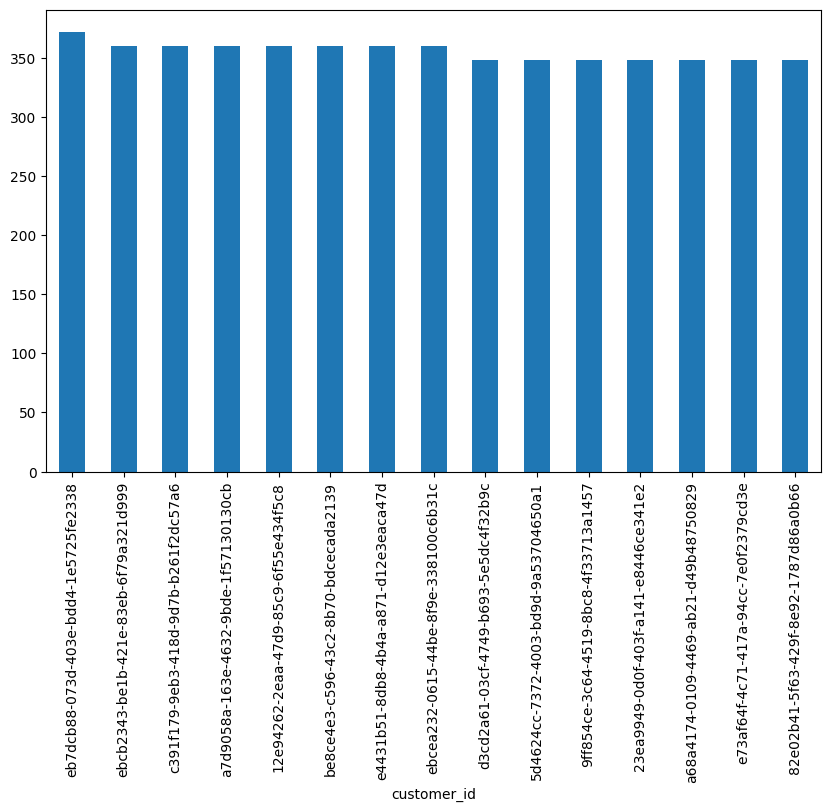

In [75]:
file['customer_id'].value_counts().sort_values(ascending=False).head(15).plot(kind = 'bar', figsize=(10, 6))

In [76]:
# pick one of the customers and see their behaviour

mask = (file['customer_id'] == 'ef15a7b3-326c-405f-9eef-3dbf43c85a9d')

In [77]:
file.loc[mask].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed


In [78]:
file.loc[mask, 'customer_id':'currency'].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency
location,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD


In [79]:
currency_and_no_of_times_used = file['currency'].value_counts()
currency_and_no_of_times_used


currency
USD    198037
GBP    191403
NGN    188880
Name: count, dtype: int64

<Axes: ylabel='count'>

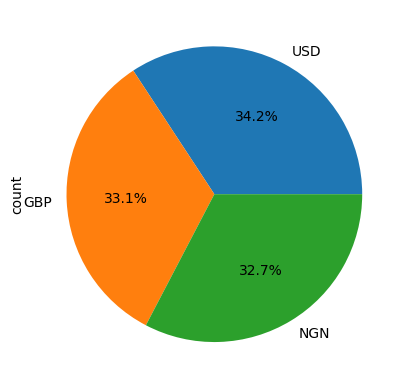

In [102]:
currency_and_no_of_times_used.plot(kind='pie', autopct='%.1f%%')

In [81]:
## Applying multiple filters....
# here we would be using the "&" and "|" operators...
# We have picked out the this particular customer... and the successful  transaction
mask1 = file['customer_id'] == 'ebcb2343-be1b-421e-83eb-6f79a321d999'

In [82]:
mask2 = (file['customer_id'] == 'ebcb2343-be1b-421e-83eb-6f79a321d999') & (file['status'] == 'success')

In [83]:
file.loc[mask2].head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,4,26110,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,2,NGN,2024-03-30 04:14:16.072620,success


In [84]:
# lets see the numbers of sucessful transaction carried out by this customer

customer = file.loc[mask2]

In [85]:
customer['status'].value_counts()

# The output showsthat the particular customer has not experienced failed transaction  at all.

status
success    360
Name: count, dtype: int64

In [86]:
#Finding out the number of failed transactions compared to others
transaction_status = file['status'].value_counts()

<Axes: xlabel='status'>

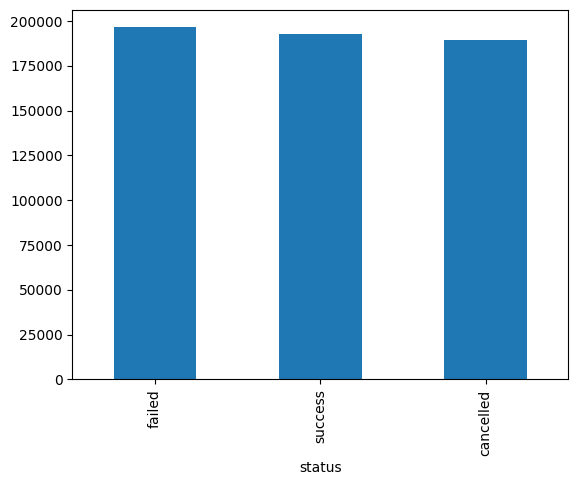

In [55]:
transaction_status.plot(kind='bar')

In [54]:
#Checking if currency has any effect on status

currency_by_status = file.groupby('status')['currency']


In [ ]:
# Highlighting Venezuela as a case study

venezuela = file.loc['Venezuela']
venezuela.head(3)


,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,12,5885,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,3,GBP,2024-03-30 04:19:11.092183,cancelled
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,11,5886,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,2,GBP,2024-03-30 04:19:11.092183,cancelled
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,13,5887,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,2,GBP,2024-03-30 04:19:11.092183,cancelled


In [90]:
venezuela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, Venezuela to Venezuela
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1875 non-null   object
 1   device_id        1875 non-null   object
 2   item_id          1875 non-null   int64 
 3   line_item_id     1875 non-null   int64 
 4   order_id         1875 non-null   object
 5   event_id         1875 non-null   int64 
 6   event_timestamp  1875 non-null   object
 7   quantity         1875 non-null   int64 
 8   currency         1875 non-null   object
 9   checked_out_at   1875 non-null   object
 10  status           1875 non-null   object
dtypes: int64(4), object(7)
memory usage: 175.8+ KB


In [92]:
# checking the shape of venezuela data. The output shows 1875 rows and 11 columns
venezuela.shape

(1875, 11)

In [93]:
# Discovering all transaction status in Venezuela
failed = venezuela[venezuela['status'] == 'failed']
success = venezuela[venezuela['status'] == 'success']
cancelled = venezuela[venezuela['status'] == 'cancelled']


In [94]:
cancelled.head(4)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,12,5885,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,3,GBP,2024-03-30 04:19:11.092183,cancelled
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,11,5886,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,2,GBP,2024-03-30 04:19:11.092183,cancelled
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,13,5887,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,2,GBP,2024-03-30 04:19:11.092183,cancelled
Venezuela,fac04056-f7aa-49b1-9ac6-7e48876f77e7,3842175e-653f-46c4-9a1b-21302def9917,4,5888,132a5ccc-e2c1-457c-995e-fee6b64fc828,27026,2024-03-30 04:03:11.092115,4,GBP,2024-03-30 04:19:11.092183,cancelled


In [ ]:
# checking the total numbers of failed transactions
failed.shape

# The output shows that there are 884 failed transactions

(884, 11)

In [100]:
# checking the total number of people who experienced failed tranactions

failed.customer_id.nunique()

10

In [ ]:
# checking the particular people whose transactions failed
failed.customer_id.unique()

# The output shows that there are 10 people whose transactions failed

array(['73466005-4251-41e3-b0f6-2c769b8070e4',
       'a1a20b8a-c896-4a7d-bef6-de2b817c92dc',
       '0509bb42-bc58-48fd-8f55-583b59974fa7',
       '62f07e90-e9aa-4e39-82e0-0b670a72458b',
       '46753a24-fef0-4115-b601-30f26aaeb6ad',
       '7df232a8-a103-4591-a390-4fc6842d5829',
       '695ecd9d-25f8-483a-9da4-3463b5943c93',
       '8ee29849-d3b0-4ac5-8f39-fecacb2dfa64',
       '3d534c87-f162-4b09-bb73-ab194cec491b',
       '7847cae3-e3b6-4076-93ed-0a5366c5639c'], dtype=object)

In [106]:
# Picking a random customer to see if I can garner any information

cust1 = failed[failed['customer_id'] == '7847cae3-e3b6-4076-93ed-0a5366c5639c']

In [ ]:
cust1.shape

# The result shows that this particular customer has 78 failed transactions

(78, 11)

In [ ]:
# Confirming the currency this customer uses to carry out his/her transactions

cust1.currency.unique()

# The result shows that the customer spends US Dollars

array(['USD'], dtype=object)

In [112]:
# confirming the successful transactions this customer carried out

success[success['customer_id'] == '7847cae3-e3b6-4076-93ed-0a5366c5639c']

# The result reveal that this customer never had any successful transaction

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,


In [ ]:
# Checking the timestamp of this customer to know if I can extract any inf from there
cust1['event_timestamp'].value_counts()


# The result reveals that most of  the transactions happened in the space of just one minute, which sounds suspicious

event_timestamp
2024-03-28 10:05:07.521518    6
2024-03-23 17:04:21.604671    6
2024-03-30 04:03:17.582012    6
2024-03-30 04:03:17.582013    6
2024-03-30 04:03:17.582073    6
2024-03-30 04:03:17.582080    6
2024-03-30 04:03:17.582081    6
2024-03-30 04:03:17.582083    6
2024-03-30 04:03:17.582085    6
2024-03-30 04:03:17.582086    6
2024-03-30 04:03:17.582088    6
2024-03-30 04:03:17.582089    6
2024-03-30 04:16:17.582092    6
Name: count, dtype: int64

In [ ]:
# checking the quantity of orders made
cust1['quantity'].sort_values(ascending=False)

location
Venezuela    5
Venezuela    5
Venezuela    5
Venezuela    5
Venezuela    5
            ..
Venezuela    1
Venezuela    1
Venezuela    1
Venezuela    1
Venezuela    1
Name: quantity, Length: 78, dtype: int64

In [116]:
cust1['order_id'].value_counts()

# The result 

order_id
c202a598-fbd4-4630-b1f0-d85da19f3b3b    78
Name: count, dtype: int64

In [ ]:
# checking the item_id

cust1['item_id'].unique()

# the result shows that this customer ordered for 6 different product t the same time

array([ 8, 11,  9,  1, 10,  6])

In [ ]:
cust1['item_id'].value_counts()

# The result shows that each item was ordered 13 times

item_id
8     13
11    13
9     13
1     13
10    13
6     13
Name: count, dtype: int64

In [ ]:
cust1['event_id'].nunique()

# The result shows that there are 13 events each

13

In [125]:
cust1['event_id'].value_counts()

event_id
151469    6
151470    6
151471    6
151472    6
151473    6
151474    6
151475    6
151476    6
151477    6
151478    6
151479    6
151480    6
151481    6
Name: count, dtype: int64

In [ ]:
cust1.duplicated().sum()

# This customer has no duplicate records

np.int64(0)

#### Insights

From the analysis carrie out on this dataset, it is obvious that the transactions from 'cust1' was likely not done by humabs, as the consistency indicates that it is either a general problem of system error, or a bot .

#### Recommendations
Iwould suggest that the case is studied all the more across different customers, perhaps there might be more insights to dig out

In [131]:
## Since Korea has the highest level of purchase,  dig a little bit deeper..
Korea = file.loc['Korea']

In [132]:
Korea.currency.unique()

array(['USD', 'GBP', 'NGN'], dtype=object)

<Axes: xlabel='currency'>

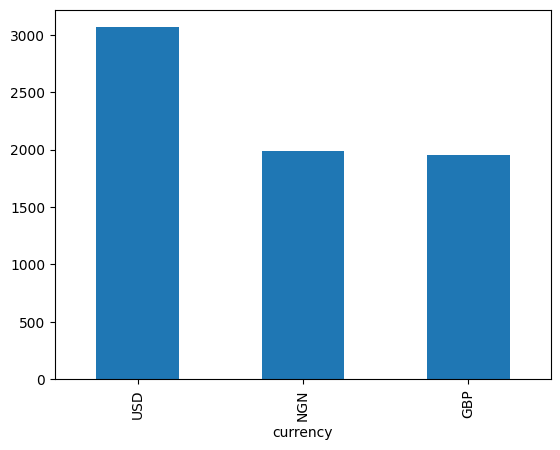

In [137]:
Korea.currency.value_counts().plot(kind='bar')

In [138]:
# checking the status of transactions in Korea
Korea['status'].unique()

array(['cancelled', 'success', 'failed'], dtype=object)

In [139]:
Korea.status.value_counts()

status
cancelled    2571
success      2444
failed       1982
Name: count, dtype: int64

<Axes: xlabel='status'>

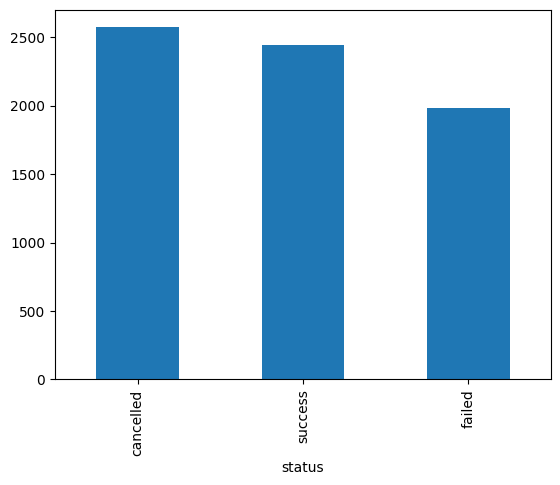

In [140]:
Korea.status.value_counts().plot(kind='bar')

In [ ]:
# Digging further

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [142]:
# tryinng to check through the different transaction statuses and see if there is anything that could have influenced it
Korea['customer_id'].unique()

array(['3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9',
       '06dd6a77-c841-4939-b036-cfe3bdf53da2',
       '34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf',
       '9c22dec8-5972-48a8-bbb7-799a143c8ed8',
       'b457e733-476a-4e7a-937e-43663473cf2c',
       '537e15dd-d4b4-4c88-9bf5-a9d91b28bfae',
       'dc92921e-d371-4be4-83a1-a6cf1ae6f14c',
       '6c43713d-d00b-4f6c-8f12-c12d544ef10e',
       'b96e4177-81e7-4707-b2e9-f595a767f91d',
       '2933e91f-39d6-44af-b1e8-933ad172a3c6',
       'eb7e787b-1b51-498f-9eb4-abb076497eb4',
       'fb5d6586-f262-4b2a-9f98-7026bbe1f627',
       '06e91d5f-3189-45b8-9c6b-5a1624eebddd',
       'b20fe203-25fc-4ad8-96e9-5c8031093064',
       '74a50970-d815-4f32-b958-5bc152098746',
       '6160bf50-4da5-4a66-b8ee-7afc316bbb7d',
       '7fa5edef-7d33-46d3-b0ba-37f8d7ef6d43',
       '3b854d31-c6d8-4726-ab17-f37ad98de785',
       'c3915c78-69af-4c0d-adcb-cc5e2ce7b30e',
       'c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810',
       '27493173-b1c8-4260-9a70-263929d06890',
       '15760

In [143]:
Korea.item_id.unique()

array([14,  8, 10,  4,  7,  6,  2, 15, 11,  3, 12,  9,  1,  5, 13])

In [144]:
Korea.line_item_id.unique()

array([ 3914,  3915,  3916,  3917,  3918,  3919,  3920,  3921,  3922,
        3923,  3924,  3925,  4103,  4104,  4105,  4123,  4124,  4125,
        4126,  4127,  4128,  4129,  4130,  4131,  4200,  4469,  4470,
        4471,  4472,  4473,  4474,  4475,  4476,  6240,  6241,  6242,
        6243,  6244,  6245,  6246,  6247,  6248,  7244,  7245,  7246,
        7247,  7248,  7249,  7250,  7251,  7252,  7253,  7254,  9210,
        9211,  9212,  9213,  9214,  9215,  9216,  9217,  9218,  9219,
        9220,  9576,  9577,  9578,  9579,  9580,  9581,  9582,  9583,
        9584,  9585,  9586,  9587,  9588,  9589,  9590,  9591,  9592,
        9593,  9594,  9595,  9596,  9597,  9598, 10105, 10106, 10107,
       10108, 10109, 10110, 10111, 10112, 10266, 10267, 10268, 10269,
       10270, 10271, 10272, 10273, 10274, 10275, 11523, 11524, 11525,
       11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 12139,
       12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148,
       12171, 12172,

In [145]:
Korea.line_item_id.nunique()

347

In [147]:
# using str.contains to select a particular status
mask4 = (file['status'].str.contains('failed'))

In [148]:
file.loc[mask4].head(4)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed


In [ ]:
#filtering the ones with failed using~3